## Stats701 Homework 6, Winter 2018¶
### Numpy and matplotlib
### Katherine Wilkinson
#### kswilk@umich.edu

I discussed this homework with Sam Edds.

### 1. Warmup: plotting CLTs

In [66]:
import numpy as np
import scipy.stats as stats
import matplotlib as mp
import matplotlib.pyplot as plt


In [67]:
## Generate Four distributions with mean 0 , variance 1

bern = np.zeros((1000))
unif = np.zeros((1000))
pois = np.zeros((1000))
norml = np.zeros((1000))
exp = np.zeros((1000))

#generate 1000 independent draws of sqrt(n)(S_n - mu)
for i in range(1000):
    ##Bernoulli
    bern_avg = np.mean((np.random.binomial(1,.75,20)-0.75)/(np.sqrt(0.75*(0.25))))
    bern[i] += np.sqrt(20)*(bern_avg)
    
    ##Uniform
    unif_avg = np.mean((np.random.uniform(0,1,20)-0.5)*np.sqrt(12))
    unif[i] += np.sqrt(20)*unif_avg
    
    ##Poisson
    pois_avg = np.mean(np.random.poisson(1,20) - 1)
    pois[i] += np.sqrt(20)*pois_avg
    
    ##Standard Normal
    norm_mean = np.mean(np.random.standard_normal(20))
    norml[i] += np.sqrt(20)*norm_mean
    
    ##Exponential
    exp_mean = np.mean(np.random.exponential(1,20) -1)
    exp[i] += np.sqrt(20)*exp_mean


In [68]:
from scipy.stats import norm
##Generate 1000 values from -4 to 4
x = np.linspace(-4,4,1000)

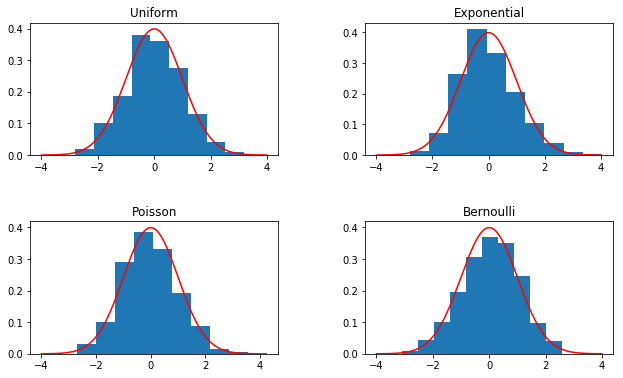

In [69]:
%matplotlib inline

##Plot uniform 
plt.subplot(221)
plt.hist(unif, normed = True)
plt.plot(x, norm.pdf(x),'r-')
#plt.set_xlim = ([-4,4])
#plt.set_ylim = ([0,300])
plt.title('Uniform')

## Uncomment this to plot normal##
#plt.subplot(222)
#plt.hist(norml, normed = True)
#plt.plot(x, norm.pdf(x),'r-')
#plt.title('Normal')

##Plot Exponential
plt.subplot(222)
plt.hist(exp, normed = True)
plt.plot(x, norm.pdf(x),'r-')
plt.title('Exponential')

##Plot Poisson
plt.subplot(223)
plt.hist(pois, normed = True)
plt.plot(x, norm.pdf(x),'r-')
plt.title('Poisson')

##Plot Bernoulli
plt.subplot(224)
plt.hist(bern, normed = True)
plt.plot(x, norm.pdf(x),'r-')
plt.title('Bernoulli')

##Adjust subplots to make more readable
plt.subplots_adjust(top=1.25, bottom=0.1, left=0.15, right=1.5, hspace=0.5,
                    wspace=0.35)

##Show Plots
_= plt.show()
#_=plt.subplots.set_xlim = ([-4,4])


### 2. Plotting Mixture of Normals

#### 2.1
Download the .zip file, extract it, and read the two files into numpy.

In [70]:
import pandas as pd

In [71]:
## Read in files
fname = 'points.dlm'
points = np.loadtxt(fname)
labels = np.load('labels.npy')
labels.shape=(100,1)

##concatenate points and labels into one file
data2 = np.concatenate((points, labels), axis = 1)

##Create subsets of data for where labels are 0 and where labels are 1
data2_1 = data2[data2[:,(2)]>0]
data2_0 = data2[data2[:,(2)]<1]

0.6519240484463609 4.172313910056705 0.6848938267350004 4.383320491103998


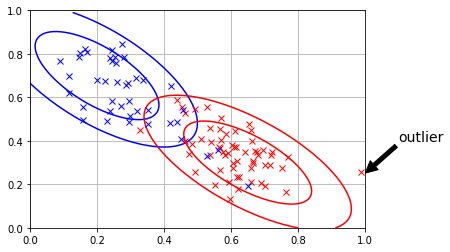

In [72]:
##Plot points, red for label = 1, blue for label = 0
plt.grid()
t = np.arange(0.0, 1.0, 0.1)
for i in range(len(data2_1)):
    plt.plot(data2_1[i][0],data2_1[i][1], 'rx',
            label = '1')
    
for j in range(len(data2_0)):
    plt.plot(data2_0[j][0],data2_0[j][1], 'bx',
            label = '0')
    

## create array for mean and sigma, label = 0
mu = np.array([0.2,0.7])
sigma = np.array([[0.015,-0.011],[-0.011,0.018]])
mvn0 = stats.multivariate_normal(mu, sigma)

det1 = (sigma[0][0]*sigma[1][1]) - (sigma[0][1]*sigma[1][0])

lv2 = (1/((2*np.pi)*(np.sqrt(det1))))*(np.exp(-(1/2)*stats.chi2.ppf(.68,2)))
lv1 = (1/((2*np.pi)*(np.sqrt(det1))))*(np.exp(-(1/2)*stats.chi2.ppf(.95,2)))

##Create ndarray grid from 0 to 1, with steps 0.01
    #aka a 100x100 grid for (x,y) coordinates
x0,y0 = np.mgrid[0:1:0.01, 0:1:0.01]
#Generate position of each point by taking x coordinate at index 0 and y coordinate at index 1
pos = np.empty(x0.shape + (2,)) #This is an empty ndarray length of x0 and each input is 2 values
pos[:, :, 0] = x0
pos[:, :, 1] = y0

#plot 1st two contours for label = 0
plt.contour(x0,y0,mvn0.pdf(pos),levels = [lv1,lv2], colors = 'blue')

## create array for mean and sigma, label = 1
mu1 = np.array([0.65,0.3])
sigma1 = np.array([[0.016,-0.011],[-0.011,0.016]])
mvn1 = stats.multivariate_normal(mu1, sigma1)

det2 = (sigma1[0][0]*sigma1[1][1]) - (sigma1[0][1]*sigma1[1][0])
lv21 = (1/((2*np.pi)*(np.sqrt(det2))))*(np.exp(-(1/2)*stats.chi2.ppf(.68,2)))
lv11 = (1/((2*np.pi)*(np.sqrt(det2))))*(np.exp(-(1/2)*stats.chi2.ppf(.95,2)))


## same set up as above to plot contours
x1,y1 = np.mgrid[0:1:0.01, 0:1:0.01]
pos = np.empty(x1.shape + (2,))
pos[:, :, 0] = x1; pos[:, :, 1] = y1

#def lvl(x):

#plot 1st two contours for label =1
plt.contour(x1,y1,mvn1.pdf(pos), levels = [lv11,lv21],colors = 'red')

##Add anotation to outlier point
plt.annotate('outlier', xy=(1,.25),xytext=(1.1,0.4), fontsize = 14,
            arrowprops=dict(facecolor = 'black', shrink = .01))

##Adjust x and y axis
plt.ylim(ymax = 1.0)
plt.xlim(xmax = 1.0)

#Show the plot. Marvel at how pretty it is. 
_ = plt.show()

### 3. Conway's Game of Life

#### 3.1
Write a function **is_valid_board** that takes an m-by-n numpy array (i.e., an ndarray)
as its only argument and returns a Python Boolean that is True if and only if the
argument is a valid representation of a Game of Life board. A valid board is any
two-dimensional numpy ndarray with all entries either 0.0 and 1.0.

In [96]:
x = np.arange(1,13)
x.shape = (3,4)

y = np.zeros((5,3))
y[0][0] = 1.0
y[2][2] = 1.0
y[2][1] = 1.0
y[1][2] = 1.0
y[3][2] = 1.0
y[3][1] = 1.0
z = np.ones((2,3))
m = [[1,2,3],[1,2,3]]


In [97]:
def is_valid_board(ndarray):
    if type(ndarray) != np.ndarray:
        return(False)
    if len(y.shape) != 2:
        return(False)
    
    if np.any(ndarray > 1) == True:
        return(False)
    elif np.any(ndarray < 0) == True:
        return(False)
    else:
        return(True)

In [98]:
is_valid_board(z)

True

#### 3.2
Write a function called **gol_step** that takes an m-by-n numpy array as its argument
and returns another numpy array of the same size (i.e., also m-by-n), corresponding
to the board at the next step of the game.

In [102]:
def gol_step(ndarray):
    if is_valid_board(ndarray) == False:
        raise TypeError('Input must be valid Game of Life board')
    m = len(ndarray)
    n = len(ndarray[0])
    ndarray_n = np.copy(ndarray)
    for x in range(0,m):
        for y in range(0,n):
            nbrs = np.sum(ndarray[max(0,x-1):x+2, max(0,y-1):y+2])- ndarray[x,y]
            
            if ndarray[x,y] == 1:
                if nbrs < 2 or nbrs > 3:
                    ndarray_n[x,y] = 0
            elif ndarray[x,y] == 0:
                if nbrs == 3:
                    ndarray_n[x,y] = 1
    return(ndarray_n)

In [101]:
test = gol_step(y)

array([[0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 1., 1.],
       [0., 0., 0.]])

#### 3.3
Write a function called **draw_gol_board** that takes an m-by-n numpy array (i.e.,
an ndarray) as its only argument and draws the board as an m-by-n set of tiles,
colored black or white correspond to whether the corresponding cell is alive or dead,
respectively. Y

In [88]:
def draw_gol_board(ndarray):
    board = plt.imshow(ndarray, cmap = 'binary')
    plt.xticks([])
    plt.yticks([])

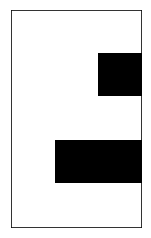

In [89]:
draw_gol_board(test)

#### 3.4
Create a 100-by-100 numpy array corresponding to a Game of Life board in which
all cells are dead, with the exception that the top-left 5-by-5 section

In [90]:
y100 = np.zeros((100,100))

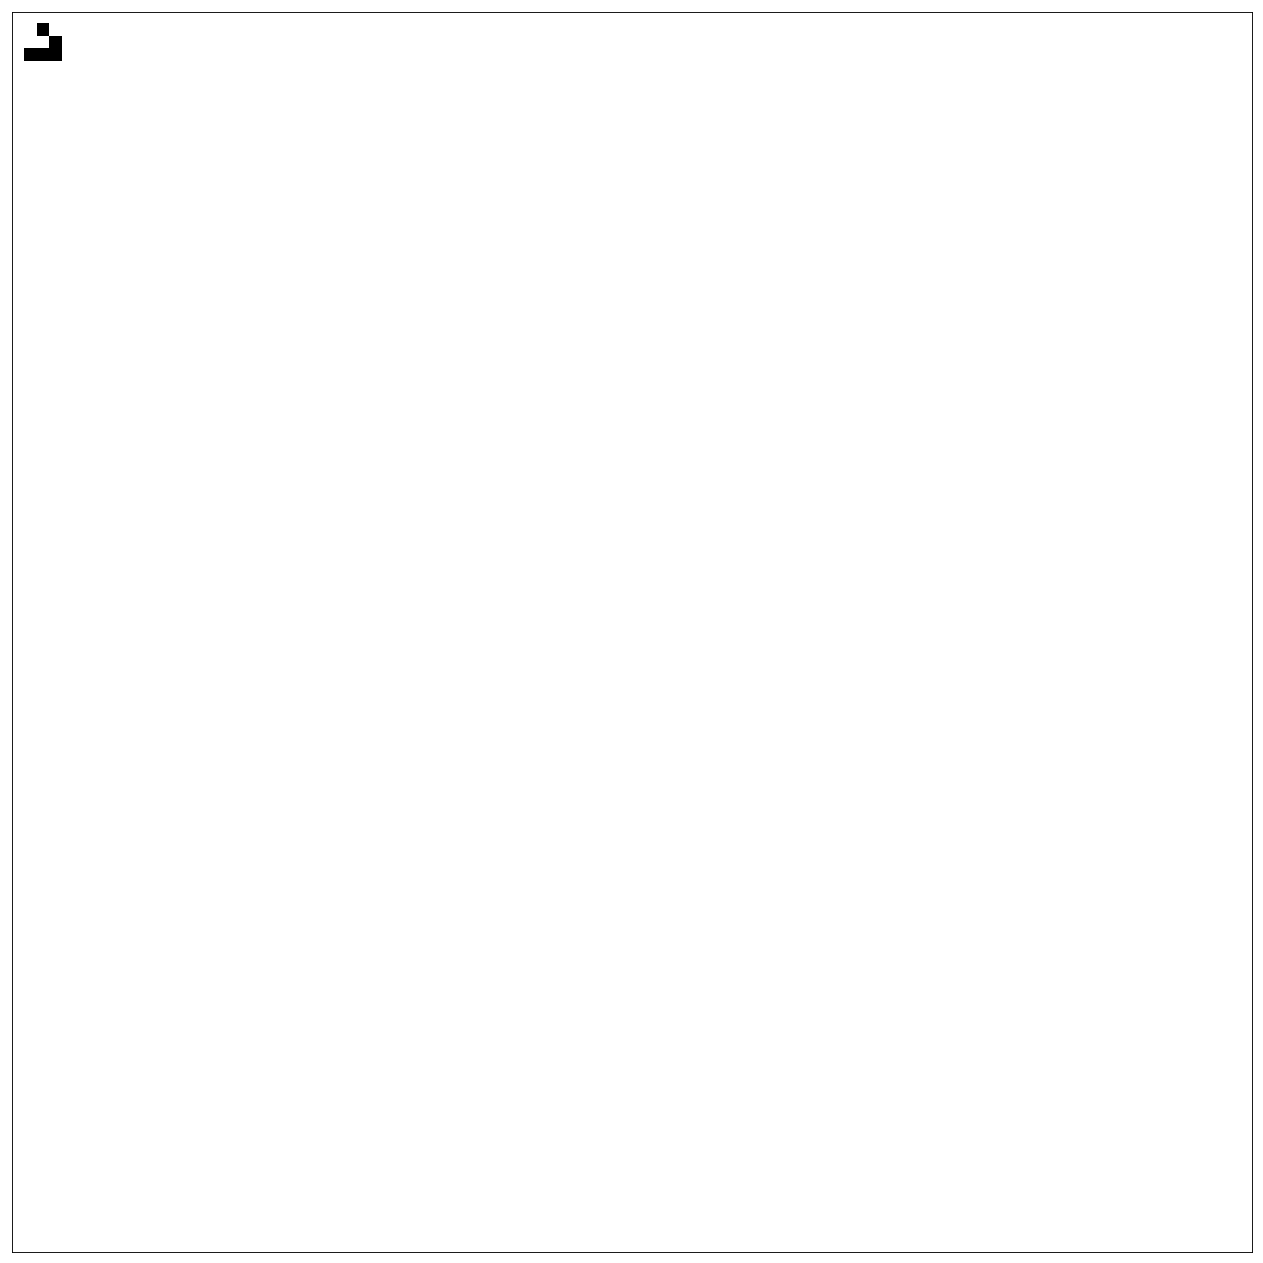

In [91]:
fig=plt.figure(figsize=(20, 25), dpi= 80, facecolor='w', edgecolor='k')
y100[0:5][1][2] = 1
y100[0:5][2][3] = 1
y100[0:5][3][1:4] = 1
draw_gol_board(y100)

#### 3.5 
Generate a plot with 5 subplots, arranged in a 5-by-1 grid, showing the first five
steps of the Game of Life when started with the board you just created, with the
steps ordered from top to bottom

In [92]:
step1 = gol_step(y100)
step2 = gol_step(step1)
step3 = gol_step(step2)
step4 = gol_step(step3)
step5 = gol_step(step4)

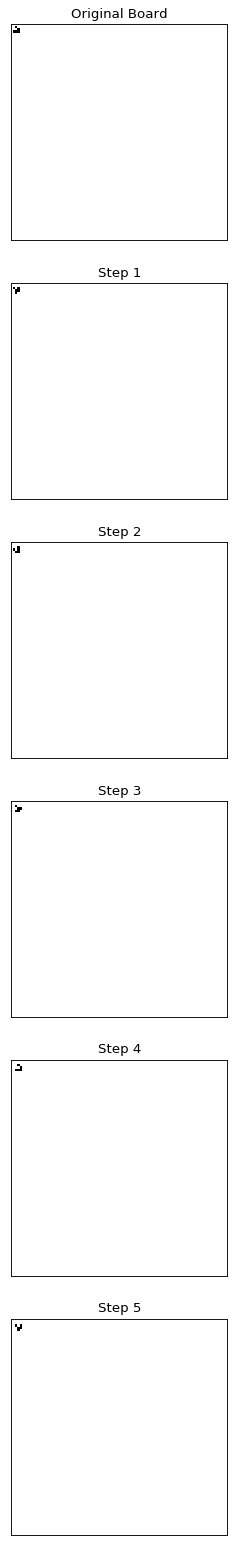

In [93]:
fig=plt.figure(figsize=(20, 25), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(611)
draw_gol_board(y100)
plt.title('Original Board')

plt.subplot(612)
draw_gol_board(step1)
plt.title('Step 1')

plt.subplot(613)
draw_gol_board(step2)
plt.title('Step 2')

plt.subplot(614)
draw_gol_board(step3)
plt.title('Step 3')

plt.subplot(615)
draw_gol_board(step4)
plt.title('Step 4')

plt.subplot(616)
draw_gol_board(step5)
plt.title('Step 5')

_=plt.show()